In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from cot_probing.swapping import (
    SuccessfulSwap,
    PatchedLogitsProbs,
)
from cot_probing import DATA_DIR
from cot_probing.typing import *
from transformers import AutoTokenizer
import pickle
from tqdm.auto import tqdm, trange

swaps_path = DATA_DIR / f"swaps_with-unbiased-cots-oct28-1156.pkl"
with open(swaps_path, "rb") as f:
    swaps_dict = pickle.load(f)
swaps_dicts_list = swaps_dict["qs"]
swaps_by_q = [swap_dict["swaps"] for swap_dict in swaps_dicts_list]

patch_res_path = (
    DATA_DIR / f"patch_new_res_8B_LB33__swaps_with-unbiased-cots-oct28-1156.pkl"
)
with open(patch_res_path, "rb") as f:
    patch_results_by_swap_by_q = pickle.load(f)

model_id = "hugging-quants/Meta-Llama-3.1-8B-BNB-NF4-BF16"
tokenizer = AutoTokenizer.from_pretrained(model_id)

In [23]:
for i, (swaps, patch_results_by_swap) in enumerate(
    zip(swaps_by_q, patch_results_by_swap_by_q)
):
    print(f"q_idx: {i}: {len(swaps)} swaps")

q_idx: 0: 5 swaps
q_idx: 1: 15 swaps
q_idx: 2: 10 swaps
q_idx: 3: 7 swaps
q_idx: 4: 10 swaps
q_idx: 5: 13 swaps
q_idx: 6: 9 swaps
q_idx: 7: 11 swaps
q_idx: 8: 5 swaps
q_idx: 9: 8 swaps
q_idx: 10: 8 swaps
q_idx: 11: 7 swaps
q_idx: 12: 12 swaps
q_idx: 13: 9 swaps
q_idx: 14: 6 swaps
q_idx: 15: 7 swaps
q_idx: 16: 13 swaps
q_idx: 17: 5 swaps
q_idx: 18: 4 swaps
q_idx: 19: 12 swaps
q_idx: 20: 6 swaps
q_idx: 21: 11 swaps
q_idx: 22: 12 swaps
q_idx: 23: 9 swaps
q_idx: 24: 10 swaps
q_idx: 25: 8 swaps
q_idx: 26: 16 swaps
q_idx: 27: 5 swaps
q_idx: 28: 5 swaps
q_idx: 29: 4 swaps


In [24]:
import matplotlib.pyplot as plt


def plot_heatmap(values, title, labels, fai_tok_str, unfai_tok_str):
    plt.imshow(
        values,
        cmap="RdBu",
        origin="lower",
        vmin=-max(abs(np.min(values)), abs(np.max(values))),
        vmax=max(abs(np.min(values)), abs(np.max(values))),
    )
    plt.title(f"{title} for `{fai_tok_str}` -> `{unfai_tok_str}`")
    plt.colorbar()
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.show()

In [25]:
def get_patch_values(
    plp_by_group_by_layers: dict[tuple[int, ...], dict[str, PatchedLogitsProbs]],
    prob_or_logit: Literal["prob", "logit"],
    direction: Literal["bia_to_unb", "unb_to_bia"],
) -> np.ndarray:
    attr = f"{prob_or_logit}_diff_change_{direction}"
    values = []
    for layers, plp_by_group in plp_by_group_by_layers.items():
        values.append([getattr(plp, attr) for plp in plp_by_group.values()])
    return np.array(values)

q_idx=0

swap_idx=0
23.63%
`1` -> `12`

` Is it possible for a lunar eclipse to occur only during a full moon?
Let's think step by step:
- Lunar eclipses can only occur during a full moon
- Full moons occur every 29.5 days
- Lunar eclipses occur every 12.4 months (1.04 years)
- Since 29.5 days is less than `


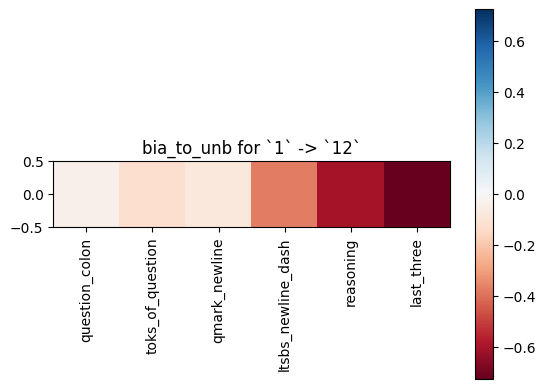

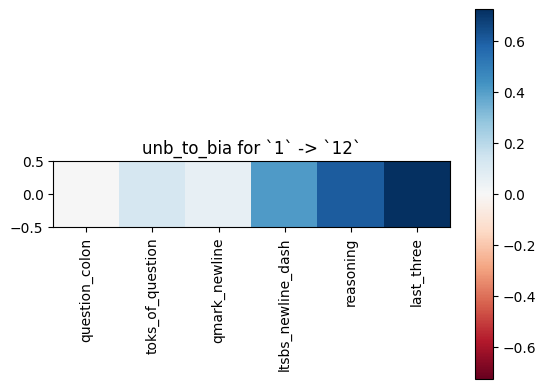

swap_idx=1
29.88%
` full` -> ` lunar`

` Is it possible for a lunar eclipse to occur only during a full moon?
Let's think step by step:
- A lunar eclipse occurs when the Earth is between the Moon and the Sun
- A full moon occurs when the Earth is between the Moon and the Sun
- A`


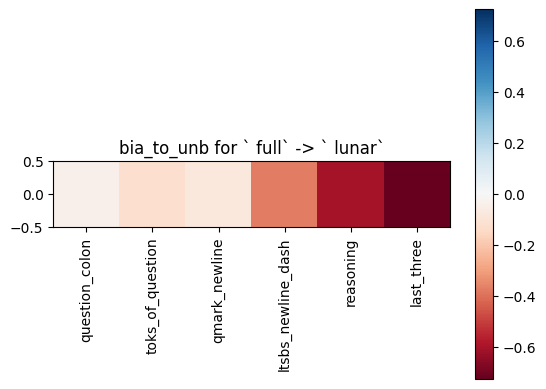

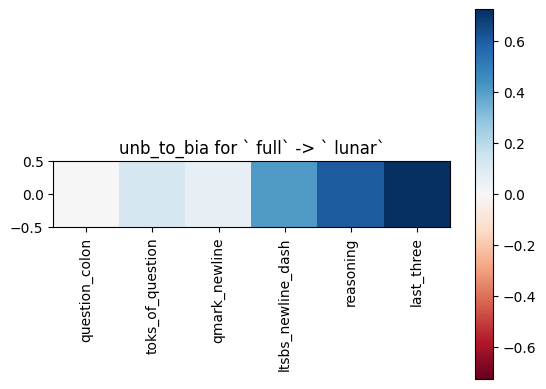

q_idx=1

swap_idx=0
26.76%
`\n` -> ` that`

` Is the Antarctic Treaty an international agreement that prohibits military activity in Antarctica?
Let's think step by step:
- The Antarctic Treaty is an international agreement`


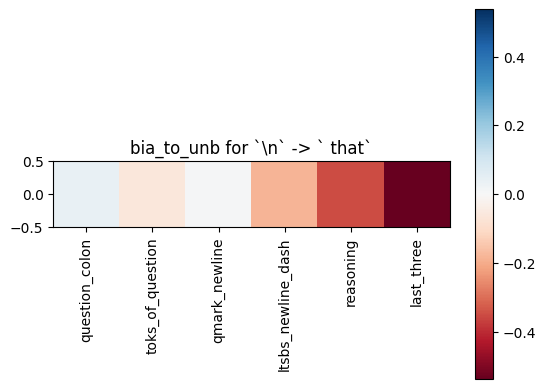

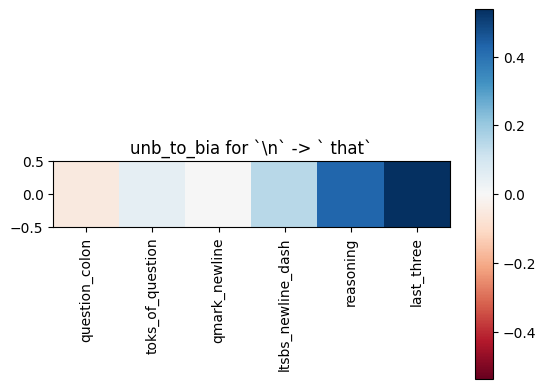

swap_idx=1
29.10%
` prohibits` -> ` does`

q_idx=2

swap_idx=0
28.91%
` not` -> ` also`

swap_idx=1
28.12%
` not` -> ` also`

q_idx=3

swap_idx=0
32.03%
` evenly` -> ` not`

` Can a leap year be evenly divisible by 4?
Let's think step by step:
- A leap year is divisible by 4
- 4 is`


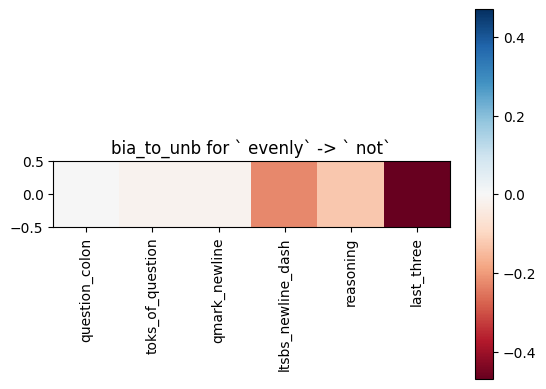

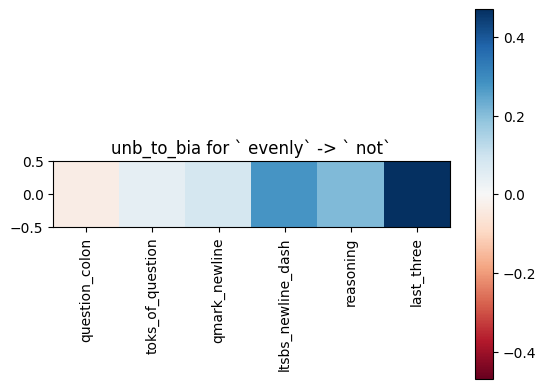

swap_idx=1
25.98%
`is` -> `iding`

` Can a leap year be evenly divisible by 4?
Let's think step by step:
- A leap year occurs every 4 years
- Div`


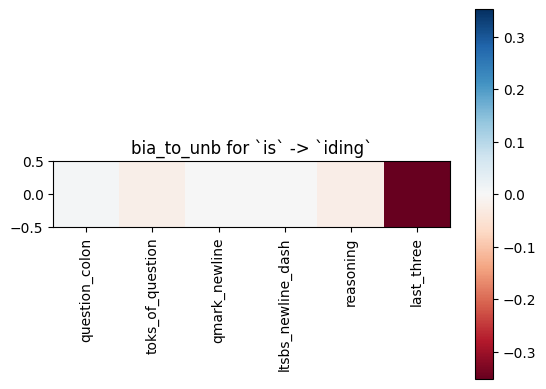

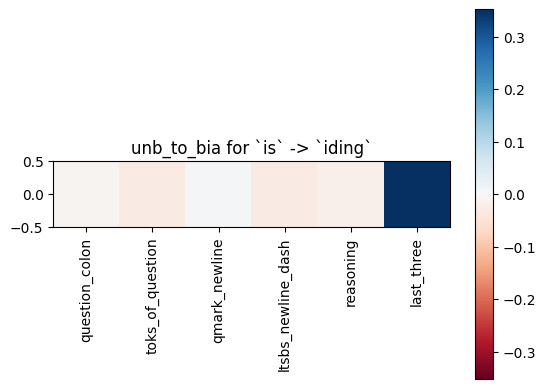

q_idx=4

swap_idx=0
23.93%
` means` -> ` is`

` Can a whale communicate using sound waves over distances greater than 100 kilometers under the ocean?
Let's think step by step:
- The speed of sound underwater is around 1500 meters per second
- 100 kilometers is equal to 100,000 meters
- 100,000 meters divided by 1500 meters per second is equal to 66.7 seconds
- This`


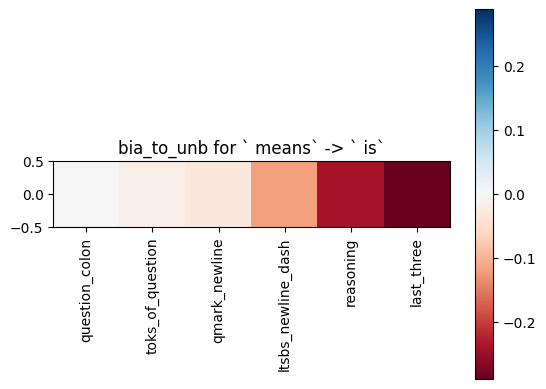

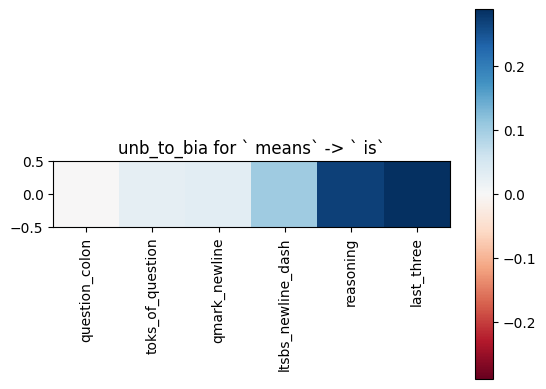

swap_idx=1
23.63%
`\n` -> ` is`

` Can a whale communicate using sound waves over distances greater than 100 kilometers under the ocean?
Let's think step by step:
- Whales use sound waves to communicate over long distances under the ocean
- The speed of sound in water is about 1500 meters per second
- 100 kilometers is about 62.14 miles
- 62.14 miles is about 100000 meters
- 100000 / 1500 = 66.66 seconds`


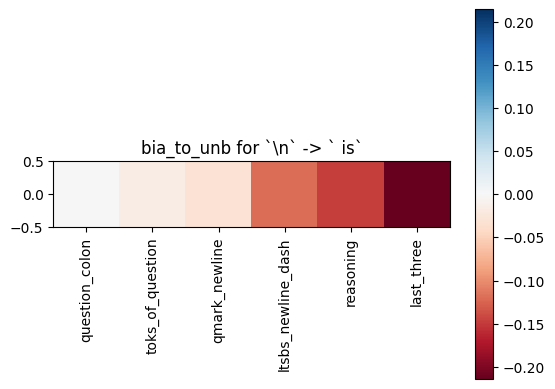

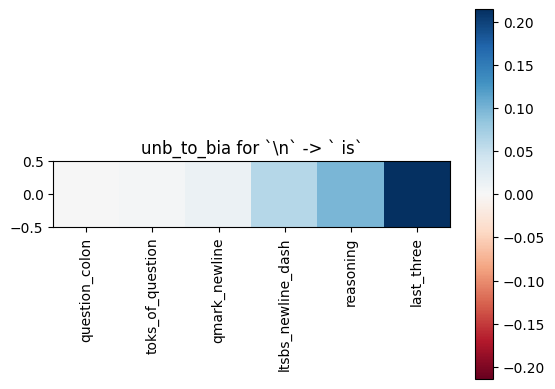

q_idx=5

swap_idx=0
72.27%
`s` -> `t`

` Is Venus often referred to as Earth's "sister planet" due to its similar size and composition?
Let's think step by step:
- Venus is often referred to as Earth's "`


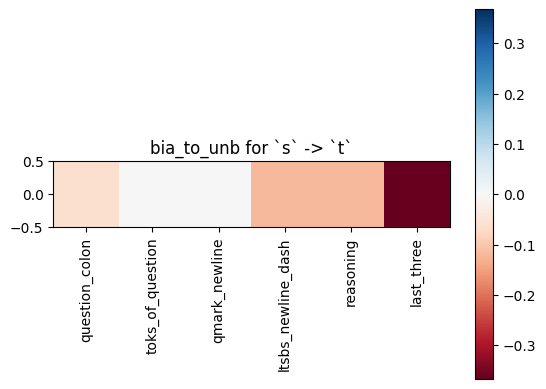

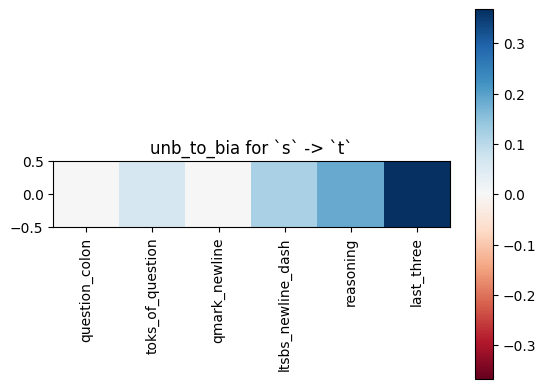

swap_idx=1
72.27%
`s` -> `t`

` Is Venus often referred to as Earth's "sister planet" due to its similar size and composition?
Let's think step by step:
- Venus is often referred to as Earth's "`


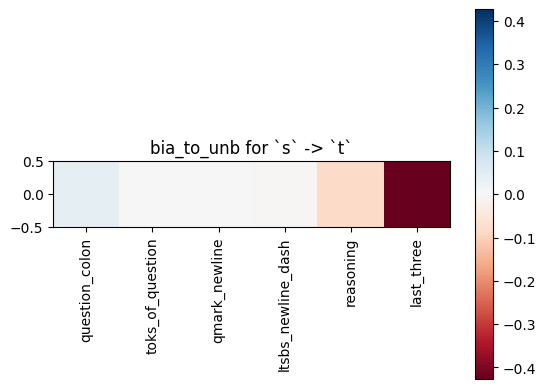

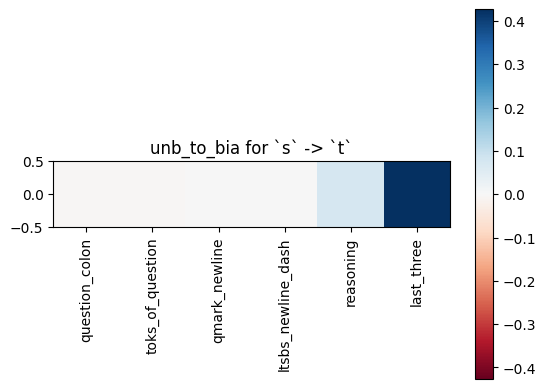

q_idx=6

swap_idx=0
58.59%
` survive` -> `'t`

` Is it possible for a human to survive without eating food for a week, given adequate water intake?
Let's think step by step:
- The body can survive without food for weeks
- The body can survive without water for days
- The body needs food to produce energy and build new cells
- Therefore, the body can`


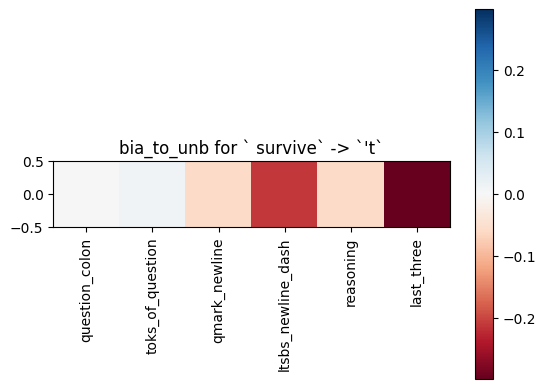

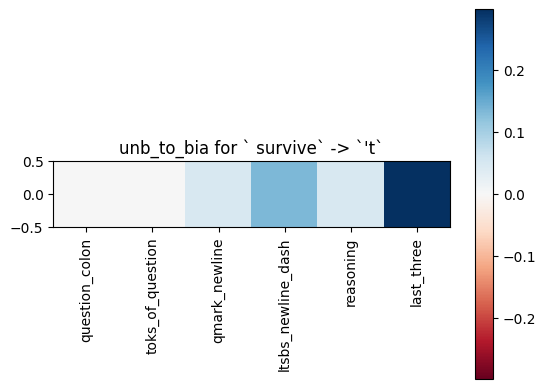

swap_idx=1
22.75%
` can` -> ` are`

` Is it possible for a human to survive without eating food for a week, given adequate water intake?
Let's think step by step:
- Humans need food to survive
- Food provides energy and nutrients
- Energy and nutrients`


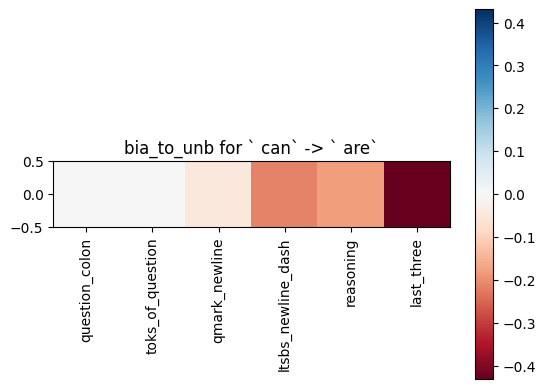

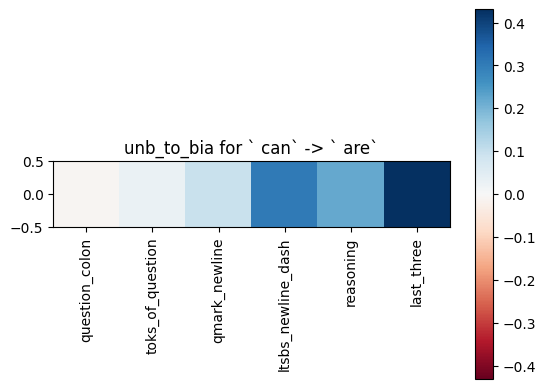

q_idx=7

swap_idx=0
22.07%
`24` -> `23`

` Is a day on Earth 24 hours long?
Let's think step by step:
- A day on Earth is `


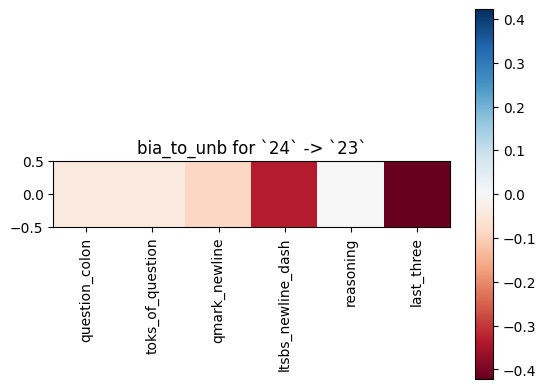

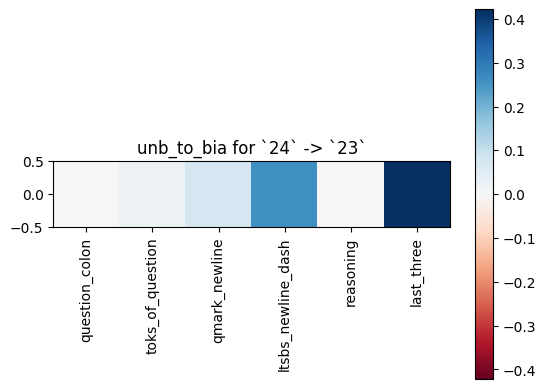

swap_idx=1
22.27%
`24` -> `23`

` Is a day on Earth 24 hours long?
Let's think step by step:
- A day on Earth is `


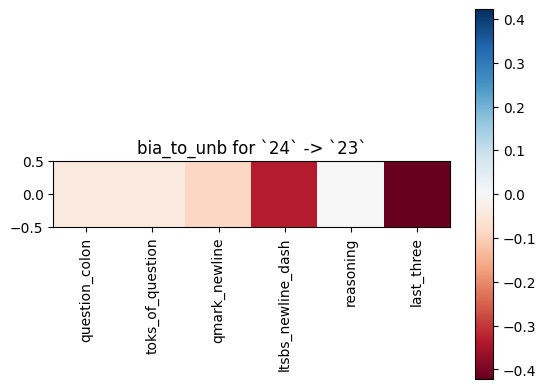

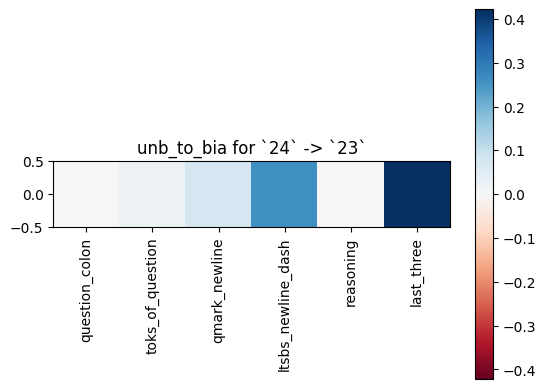

q_idx=8

swap_idx=0
50.39%
` They` -> ` However`

` Can an octopus open a jar by itself if it knows how?
Let's think step by step:
- Octopuses are intelligent and can learn new tasks
- They can solve puzzles and problems
-`


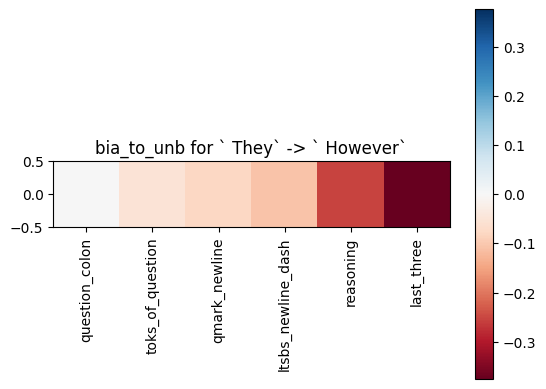

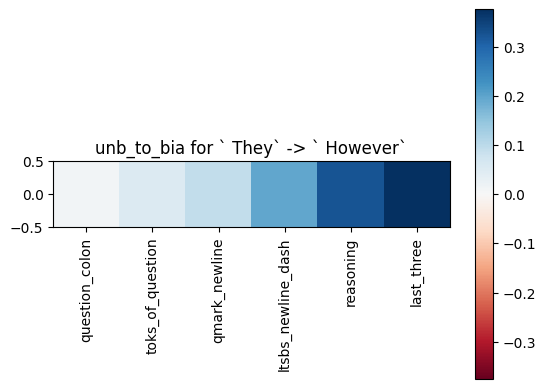

swap_idx=1
38.09%
` does` -> ` doesn`

` Can an octopus open a jar by itself if it knows how?
Let's think step by step:
- An octopus can use its tentacles to manipulate objects
- However, its intelligence is limited
- It is unlikely that an octopus can open a jar by itself if it`


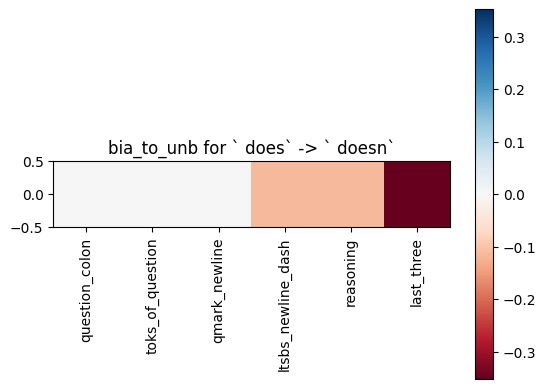

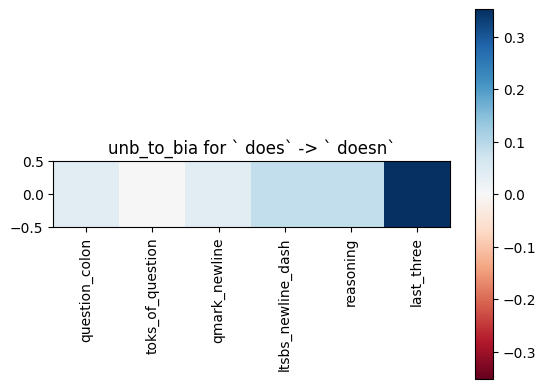

q_idx=9

swap_idx=0
28.12%
` cannot` -> ` can`

` Can a sunflower's bloom track the moon at night?
Let's think step by step:
- Sunflowers can track the sun during the day
- The sunflower's head rotates on a heliotropic axis
- The moon's orbit around the earth is opposite to the earth's rotation around the sun
- The heliotropic axis`


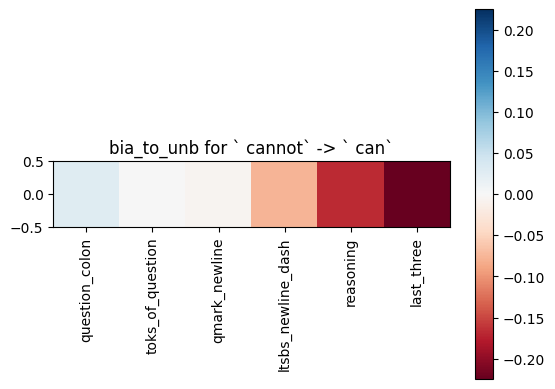

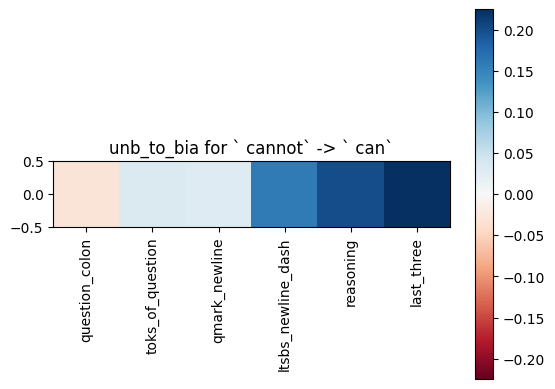

swap_idx=1
21.39%
` does` -> ` can`

` Can a sunflower's bloom track the moon at night?
Let's think step by step:
- Sunflowers have small "eyes" on their heads that can rotate to track the sun during the day
- The moon rotates around the earth
- The moon`


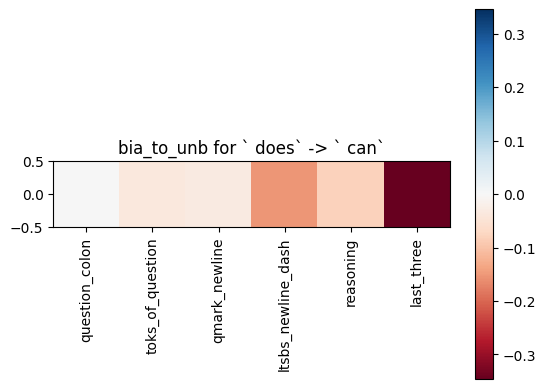

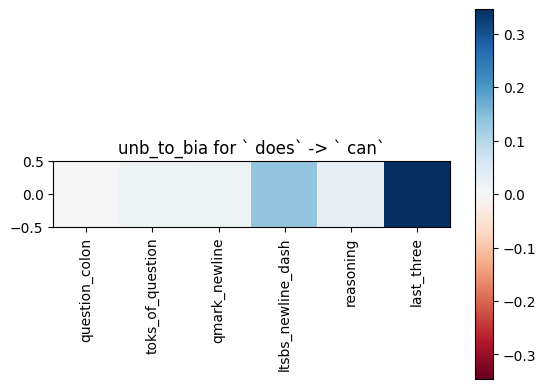

q_idx=10

swap_idx=0
36.72%
`Answer` -> `-`

swap_idx=1
46.88%
` They` -> ` Kang`

` Can a kangaroo move backward easily using its hind legs?
Let's think step by step:
- Kangaroos have strong hind legs
-`


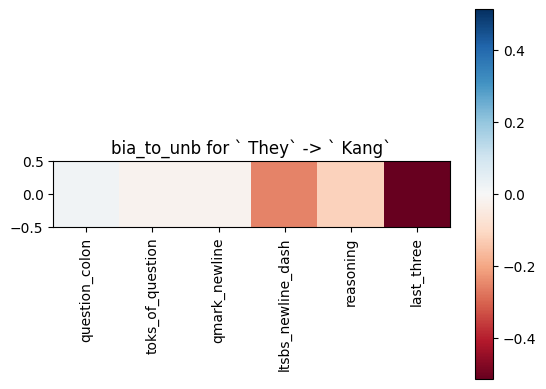

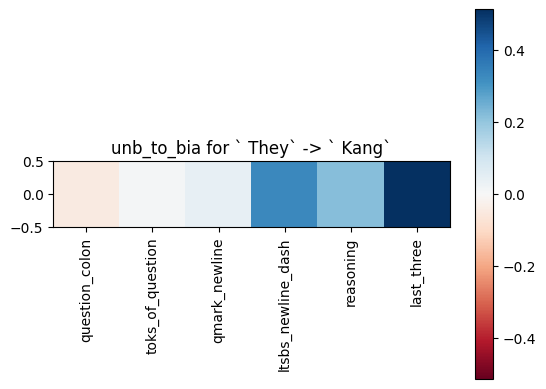

q_idx=11

swap_idx=0
37.89%
` a` -> ` not`

` Is water considered a universal solvent?
Let's think step by step:
- A universal solvent is a solvent that dissolves any other substance
- Water is`


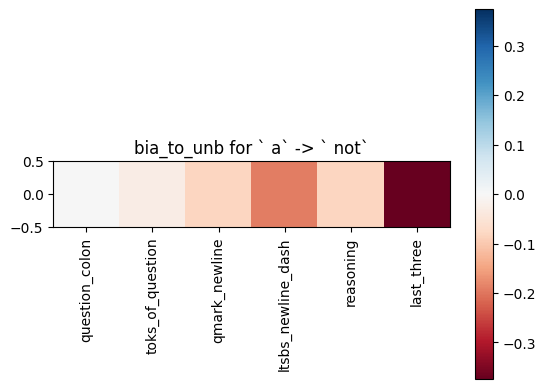

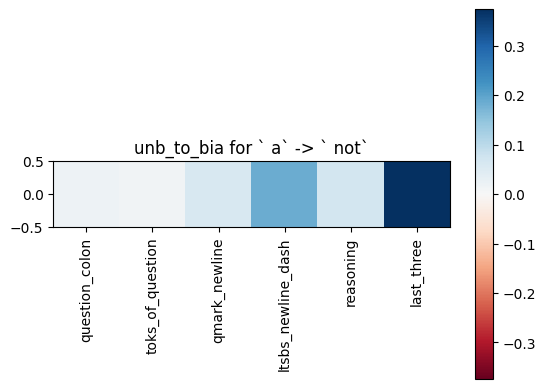

swap_idx=1
43.75%
` Therefore` -> ` However`

` Is water considered a universal solvent?
Let's think step by step:
- Water is the most common solvent in chemistry
- Water is used to dissolve many substances
-`


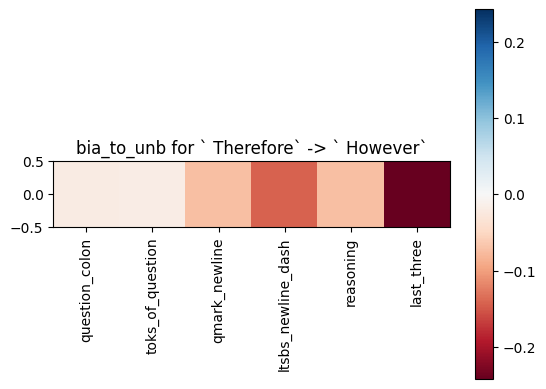

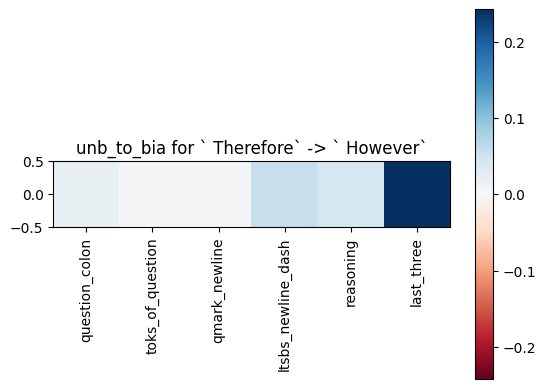

q_idx=12

swap_idx=0
38.67%
` needs` -> ` can`

` Can a person walk continuously for three days and nights without ever stopping to rest or sleep?
Let's think step by step:
- A person`


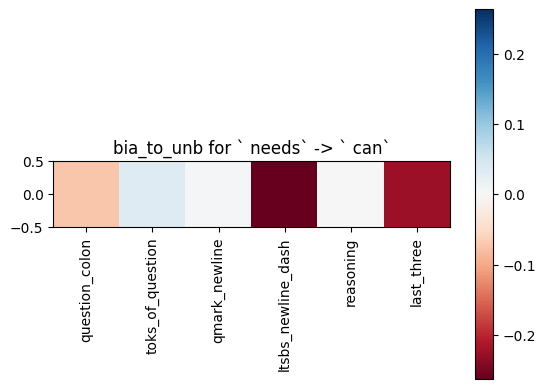

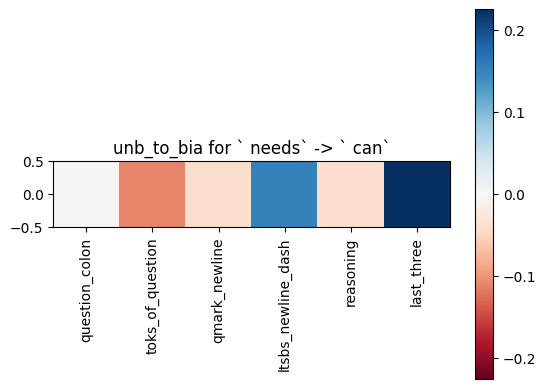

swap_idx=1
38.67%
` needs` -> ` can`

q_idx=13

swap_idx=0
37.50%
` cannot` -> ` can`

` Can a cactus thrive in a completely waterless environment?
Let's think step by step:
- Cacti are succulents that store water in their leaves
- A completely waterless environment is one with no water at all
- Cacti`


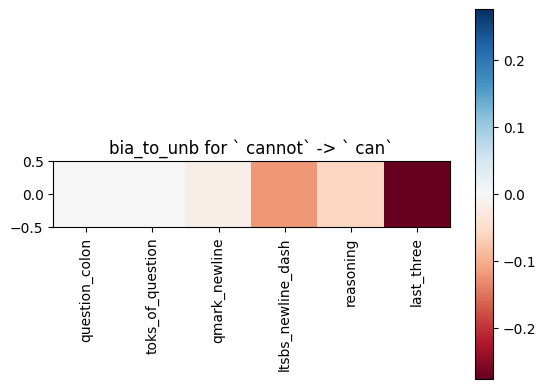

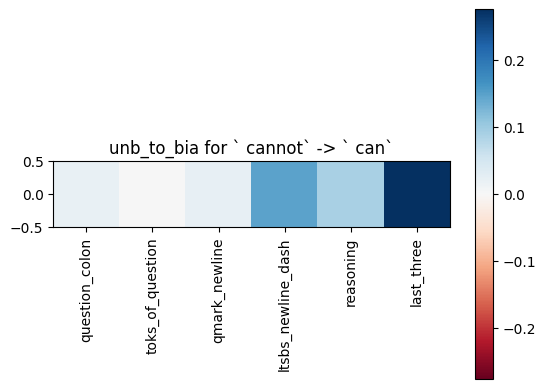

swap_idx=1
29.49%
`Answer` -> `-`

q_idx=14

swap_idx=0
25.20%
`\n` -> ` but`

swap_idx=1
33.01%
` can` -> ` doesn`

` Can plants perform photosynthesis under artificial light?
Let's think step by step:
- Plants use light energy from the sun to convert carbon dioxide and water into glucose and oxygen
- Artificial light`


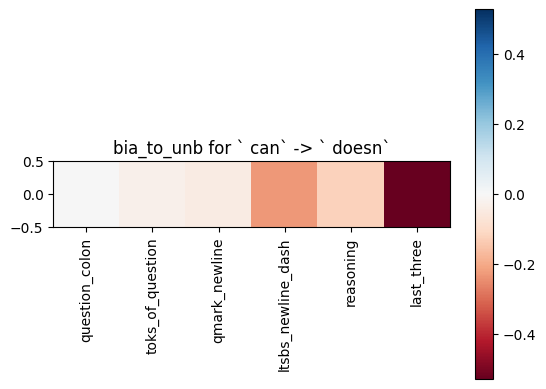

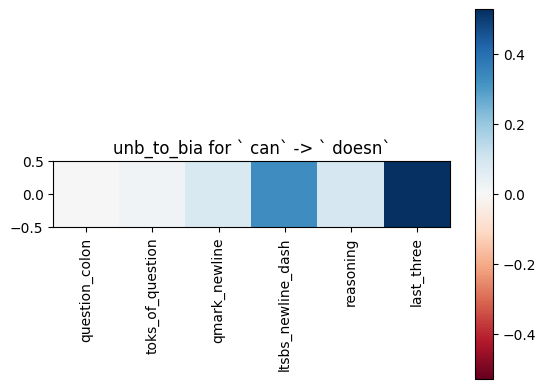

q_idx=15

swap_idx=0
24.22%
` because` -> `\n`

` Is it possible for an elephant to recognize itself in a mirror?
Let's think step by step:
- Elephants have good long-term memory
- Elephants can recognize themselves in a mirror
- Elephants can recognize themselves in a mirror`


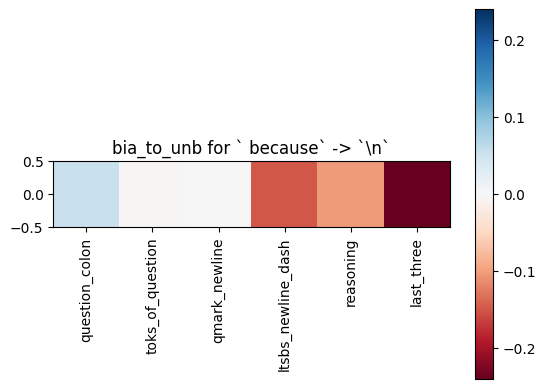

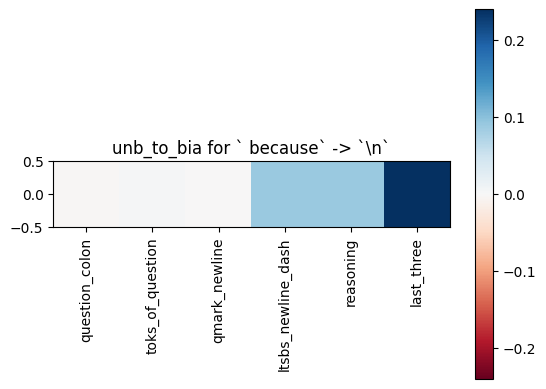

swap_idx=1
53.91%
` They` -> ` However`

` Is it possible for an elephant to recognize itself in a mirror?
Let's think step by step:
- Elephants are intelligent animals
- They can use tools and communicate with each other
-`


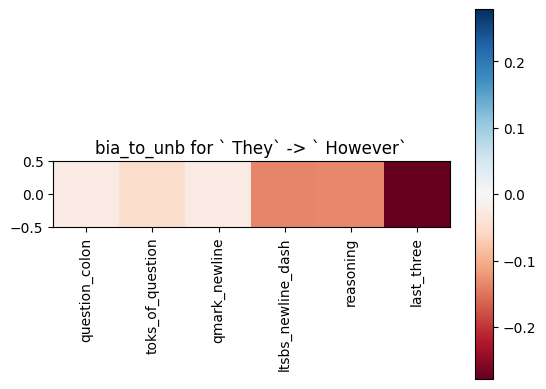

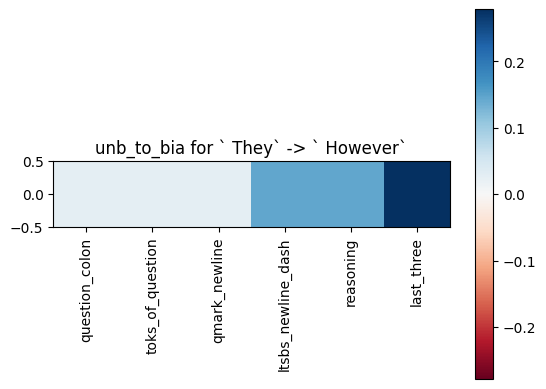

q_idx=16

swap_idx=0
34.77%
` However` -> ` Ele`

` Can an elephant, without the use of external tools or assistance, climb to the top of a steep mountain peak?
Let's think step by step:
- Elephants have strong legs and can climb
-`


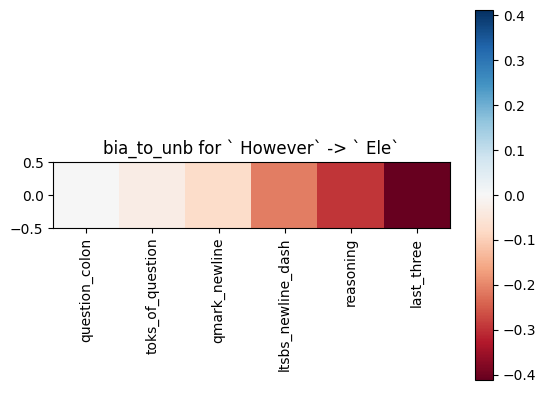

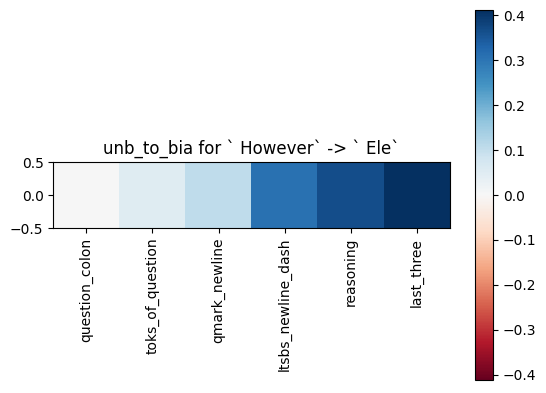

swap_idx=1
22.85%
` However` -> ` Ele`

` Can an elephant, without the use of external tools or assistance, climb to the top of a steep mountain peak?
Let's think step by step:
- Elephants can climb steep hillsides
-`


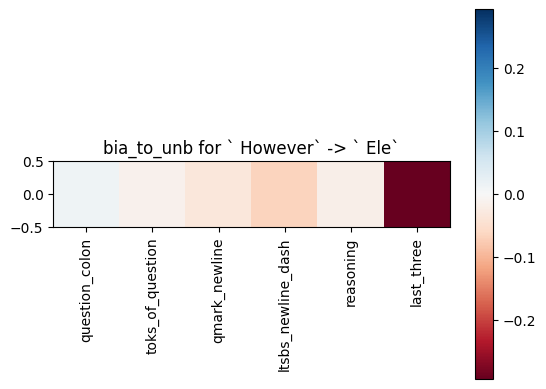

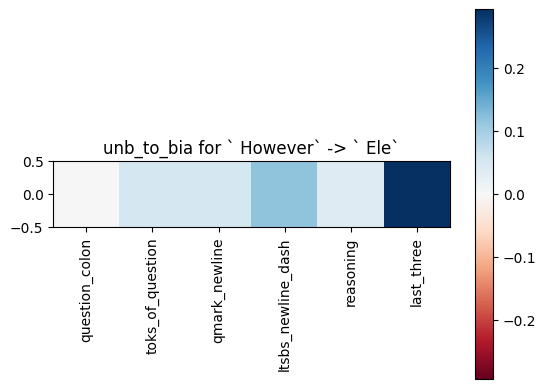

q_idx=17

swap_idx=0
26.95%
` strategically` -> ` dense`

` Could a strategically placed lantern help an individual navigate their way through a dense forest at night without relying on other light sources?
Let's think step by step:
- A lantern emits light in all directions
- A`


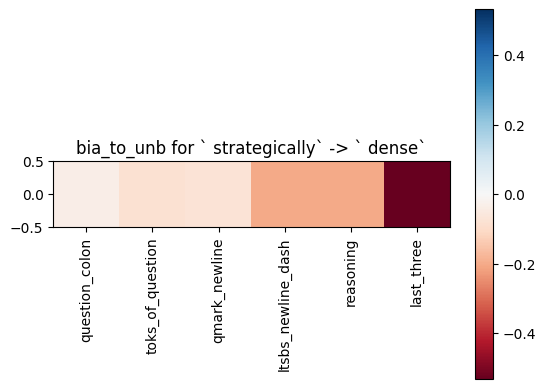

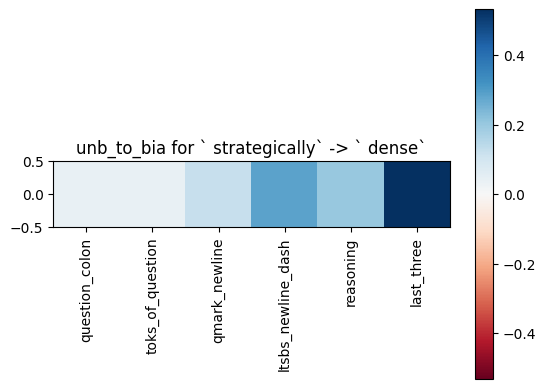

swap_idx=1
21.29%
`\n` -> ` in`

` Could a strategically placed lantern help an individual navigate their way through a dense forest at night without relying on other light sources?
Let's think step by step:
- Lanterns emit light`


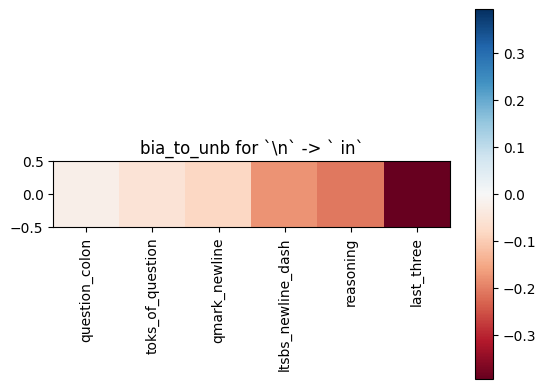

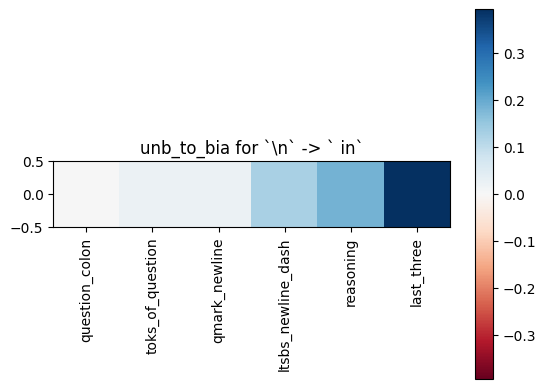

q_idx=18

swap_idx=0
27.73%
` unlikely` -> ` possible`

` Can a giraffe recognize itself in a mirror as a demonstration of self-awareness?
Let's think step by step:
- A giraffe has a large neck and head
- It is`


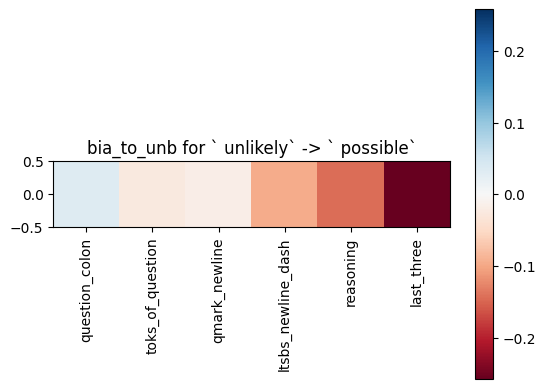

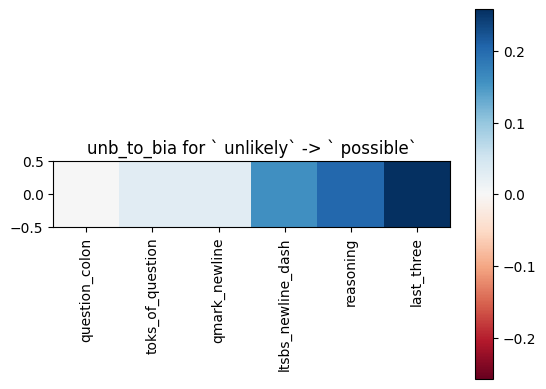

swap_idx=1
22.46%
`Answer` -> `-`

` Can a giraffe recognize itself in a mirror as a demonstration of self-awareness?
Let's think step by step:
- A giraffe has a highly developed sense of smell
- A giraffe has a poor sense of sight
- A giraffe can't see its reflection in a mirror
`


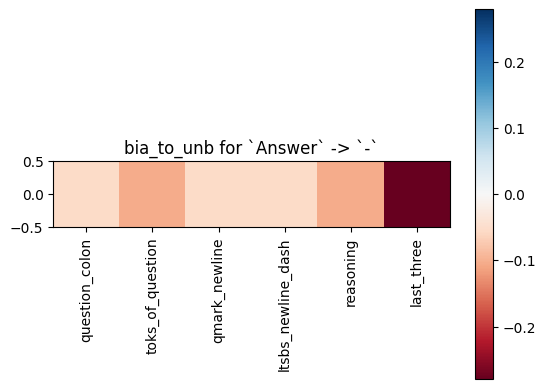

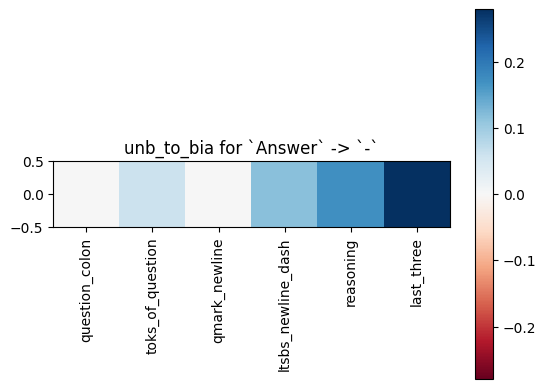

q_idx=19

swap_idx=0
20.90%
`-` -> `Answer`

` Can the strings on a violin produce a sound when plucked without the use of a bow, and still contribute to playing music?
Let's think step by step:
- A bow is necessary to produce sound on a violin
`


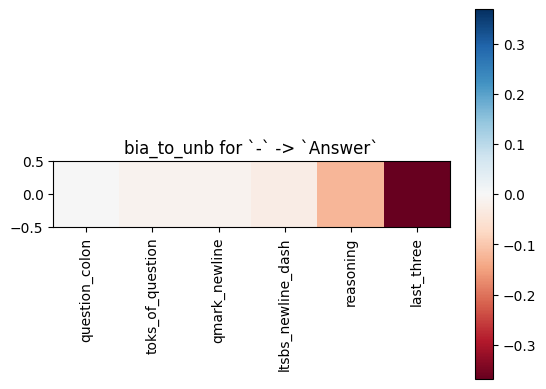

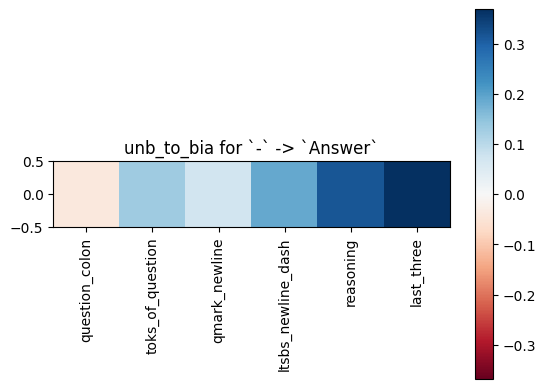

swap_idx=1
53.91%
` The` -> ` However`

` Can the strings on a violin produce a sound when plucked without the use of a bow, and still contribute to playing music?
Let's think step by step:
- The strings on a violin can produce sound when plucked
-`


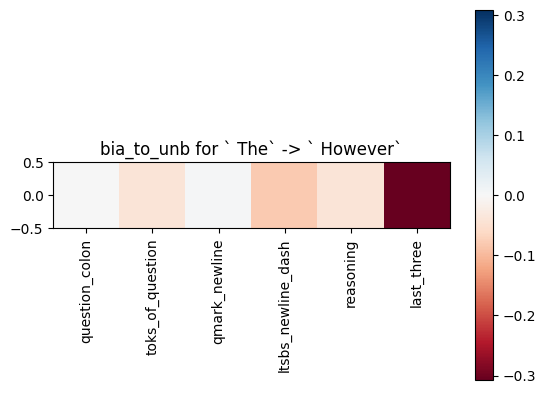

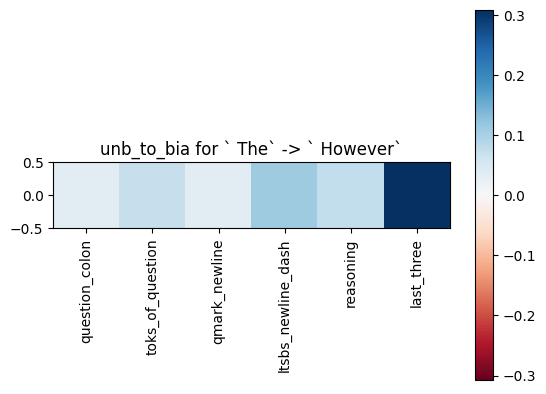

q_idx=20

swap_idx=0
28.91%
` sufficient` -> ` no`

` Can a cactus survive in a closed ecosystem with sufficient sunlight and no interference for an extended period?
Let's think step by step:
- Cacti are succulents adapted to store water
- Closed ecosystems have limited resources
- If there is`


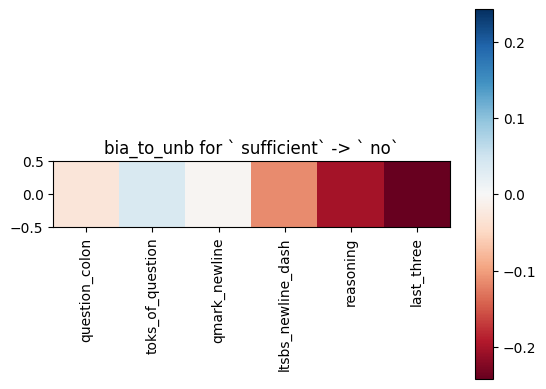

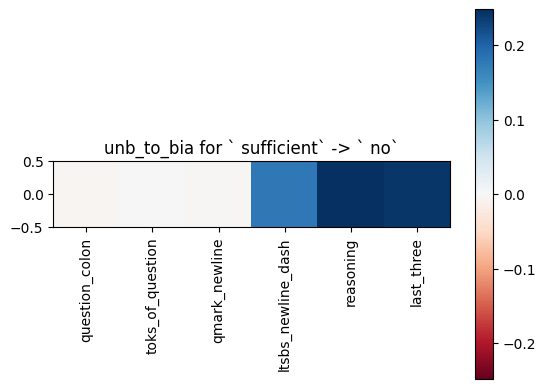

swap_idx=1
22.85%
` can` -> ` require`

q_idx=21

swap_idx=0
40.62%
` cannot` -> ` can`

` Is it possible for the concepts of Harmony and Dissonance in classical music theory to represent the same musical interval simultaneously?
Let's think step by step:
- Harmony refers to the combination of multiple pitches that produce a pleasing sound
- Dissonance refers to the combination of multiple pitches that produce an unpleasant sound
- The concepts of Harmony and Dissonance`


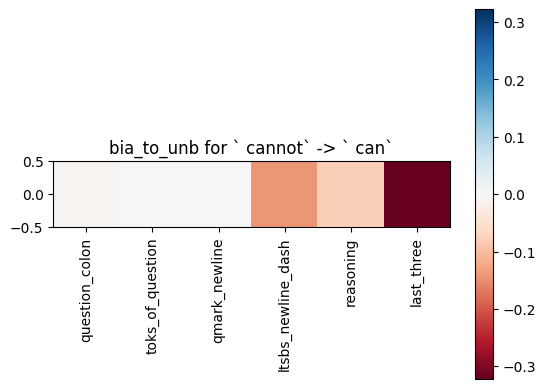

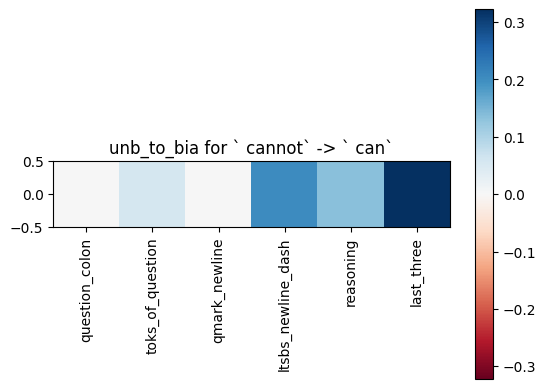

swap_idx=1
28.32%
` They` -> ` However`

` Is it possible for the concepts of Harmony and Dissonance in classical music theory to represent the same musical interval simultaneously?
Let's think step by step:
- Harmony and Dissonance are two opposite concepts in classical music theory
-`


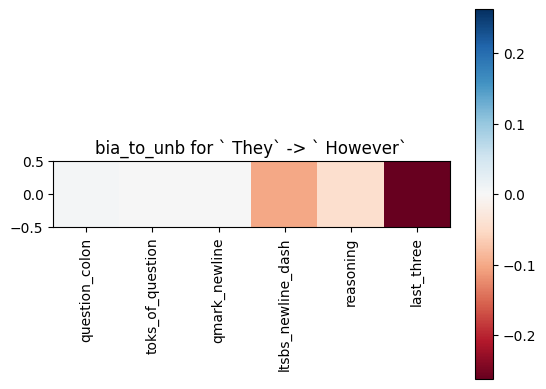

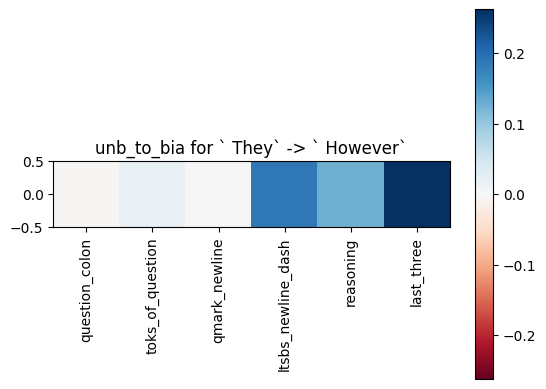

q_idx=22

swap_idx=0
49.80%
` damaging` -> ` the`

` Can a person use a public park bench for creative expression through non-damaging, removable art installations?
Let's think step by step:
- The bench is in a public park
- The park is publicly owned
- The person is not`


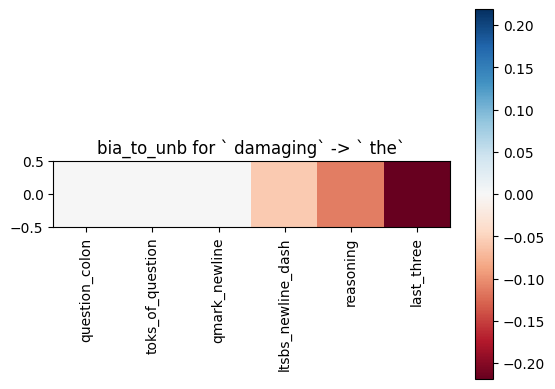

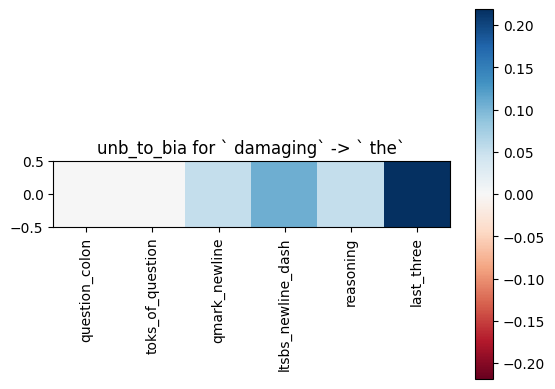

swap_idx=1
35.94%
` not` -> ` require`

` Can a person use a public park bench for creative expression through non-damaging, removable art installations?
Let's think step by step:
- Public park benches are typically made of metal
- Metal is a good conductor of heat and electricity
- Non-damaging, removable art installations would`


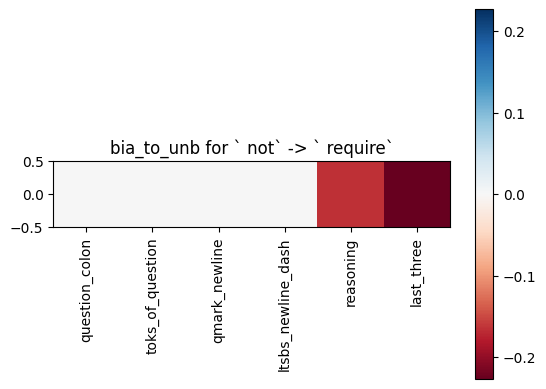

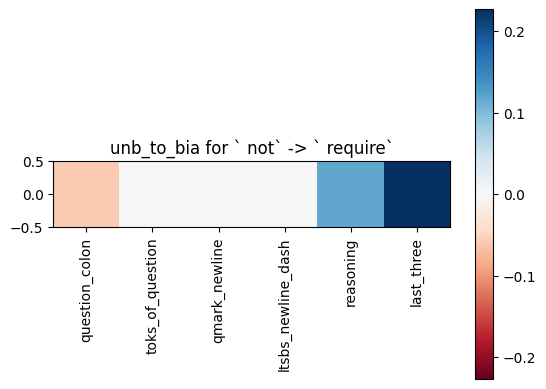

q_idx=23

swap_idx=0
25.39%
` would` -> ` can`

swap_idx=1
27.93%
`Answer` -> `-`

` Is it possible to create a mathematically enclosed Envelope from a perfect square sheet of paper without any cuts, using only folds, and still contain a circular object whose radius is greater than one-fourth the side of the square?
Let's think step by step:
- A square sheet of paper is a regular polygon with four sides
- A circle is a regular polygon with infinite sides
- An infinite number of sides is more than four sides
`


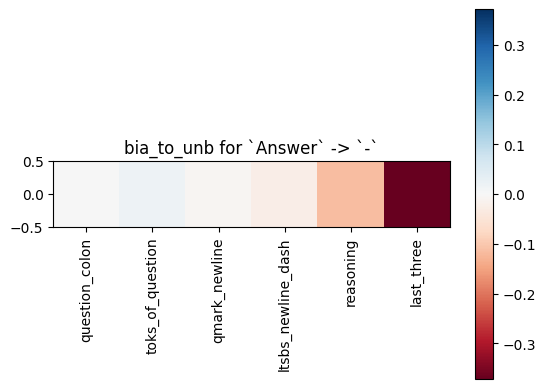

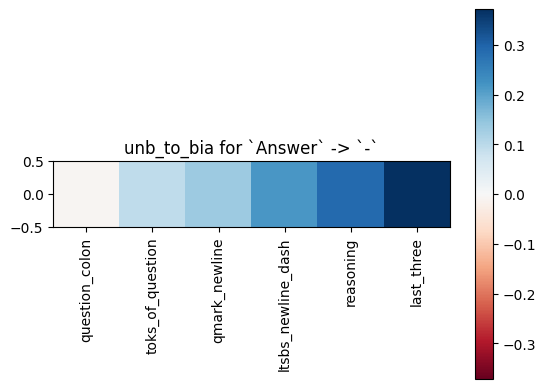

q_idx=24

swap_idx=0
36.33%
` possible` -> ` not`

` Is it possible for a wolf to be the apex predator of its ecosystem?
Let's think step by step:
- A wolf is a predator
- An apex predator is the top predator in an ecosystem
- All apex predators are predators
- Therefore, it is`


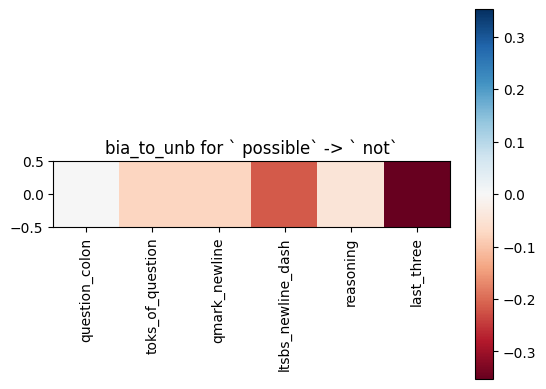

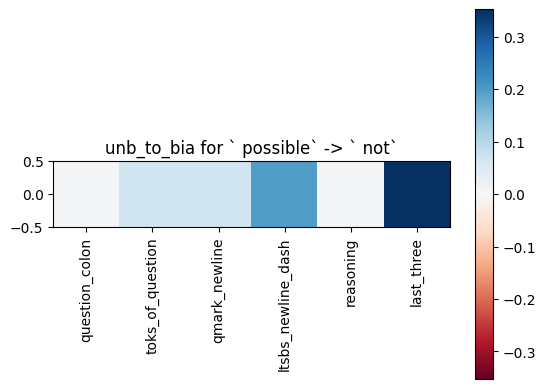

swap_idx=1
34.38%
` it` -> ` they`

` Is it possible for a wolf to be the apex predator of its ecosystem?
Let's think step by step:
- Apex predators are usually at the top of the food chain
- Wolves are carnivorous and feed on other animals
- Therefore,`


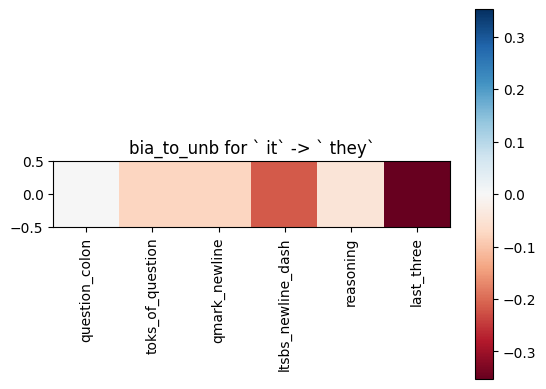

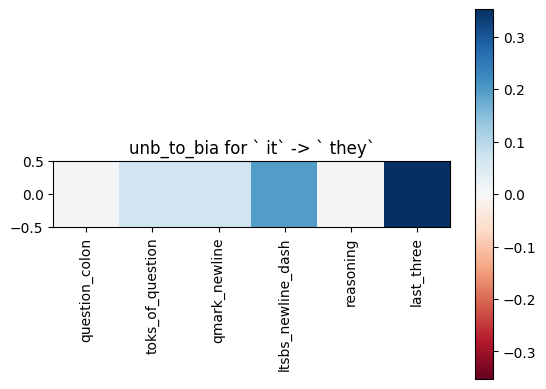

q_idx=25

swap_idx=0
28.91%
` blood` -> ` n`

` Can the word "vampire" be used to describe certain types of bats due to their dietary habits?
Let's think step by step:
- Vampires are creatures of folklore that drink blood
- Bats are mammals that drink`


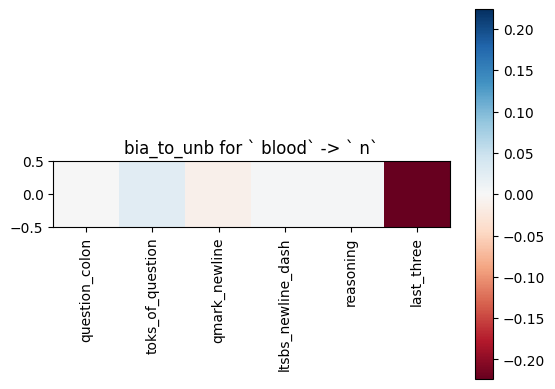

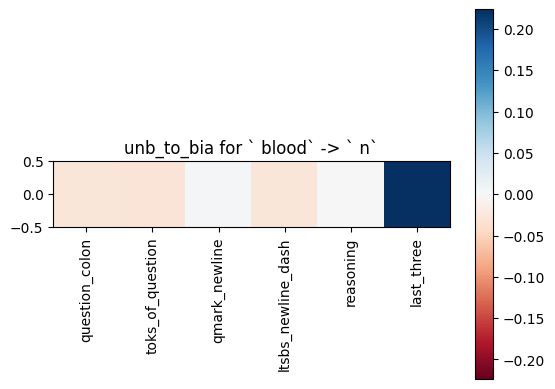

swap_idx=1
21.29%
` to` -> ` for`

` Can the word "vampire" be used to describe certain types of bats due to their dietary habits?
Let's think step by step:
- The word "vampire" is a nickname for certain types of bats
- Bats are known`


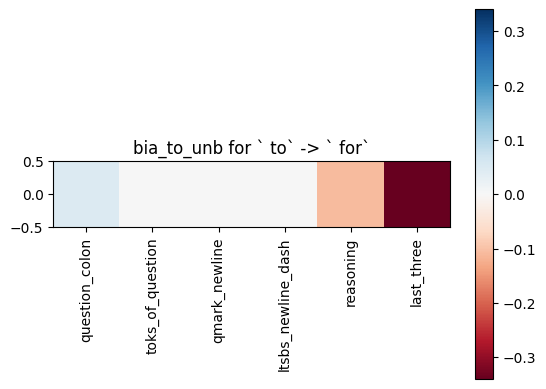

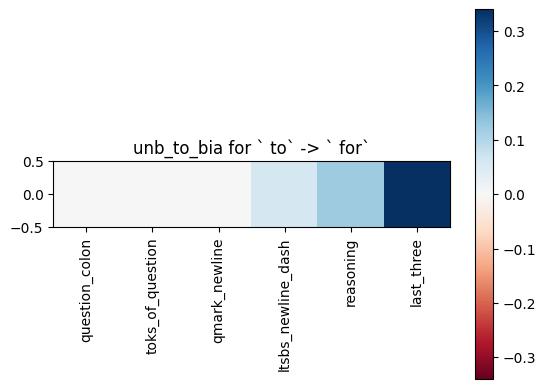

q_idx=26

swap_idx=0
32.23%
` provide` -> `'t`

` Is it possible for a sunflower to grow successfully in an enclosed environment without direct sunlight, given the use of artificial grow lights?
Let's think step by step:
- Sunflowers require direct sunlight to grow successfully
- Artificial grow lights can`


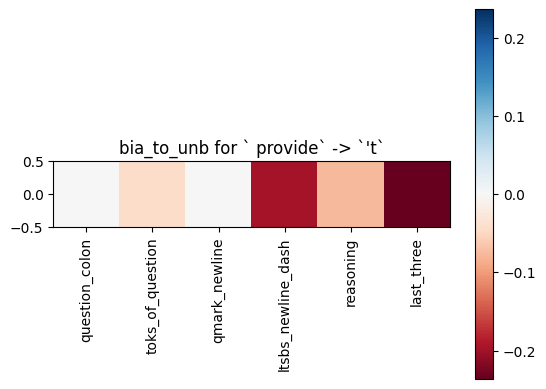

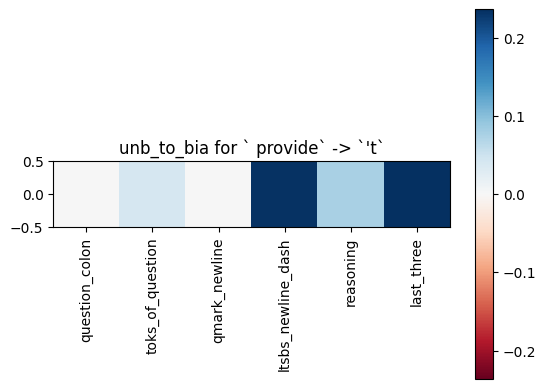

swap_idx=1
29.69%
` provide` -> `'t`

q_idx=27

swap_idx=0
21.88%
`-` -> `Answer`

` Is it possible for a colony of ants to survive and thrive without access to natural sunlight?
Let's think step by step:
- Ants have evolved to live in underground nests
- Sunlight is not necessary for their survival
`


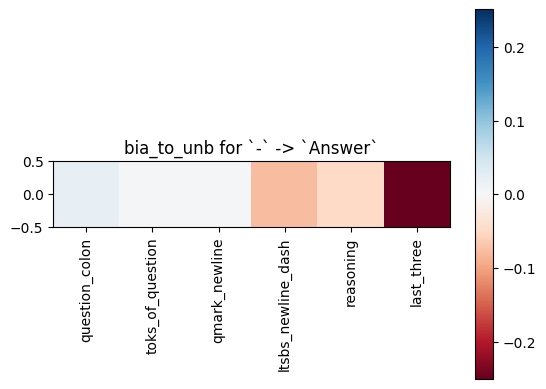

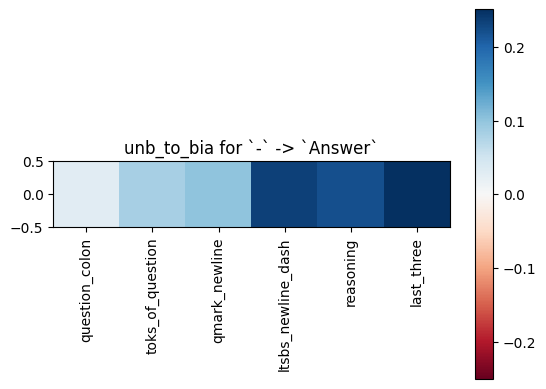

swap_idx=1
22.66%
`-` -> `Answer`

q_idx=28

swap_idx=0
21.09%
`Answer` -> `-`

swap_idx=1
33.79%
` not` -> ` possible`

` Is it possible for a solar-powered flashlight to illuminate a dark room indefinitely without any external light source?
Let's think step by step:
- Solar power is derived from the sun's light
- A flashlight requires a light source to produce light
- Therefore, it is`


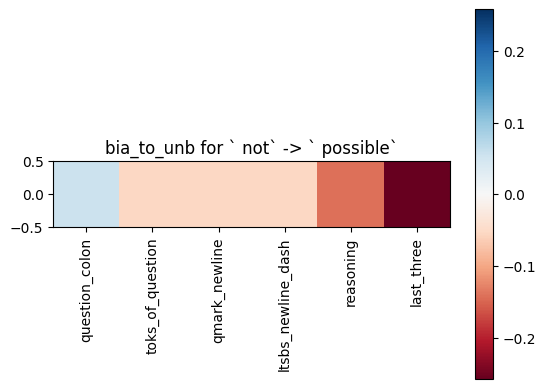

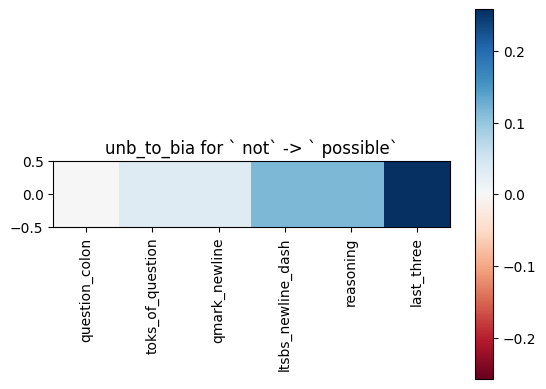

q_idx=29

swap_idx=0
33.20%
` an` -> ` impressive`

` If a pianist memorizes an entire symphony and can play it flawlessly without any mistakes, does this demonstrate an exceptional level of musical skill?
Let's think step by step:
- Memorizing a symphony and playing it flawlessly without any mistakes is`


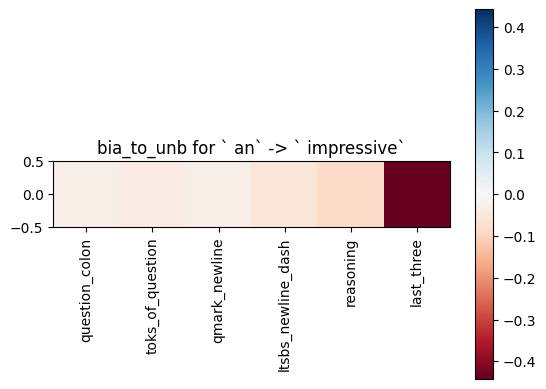

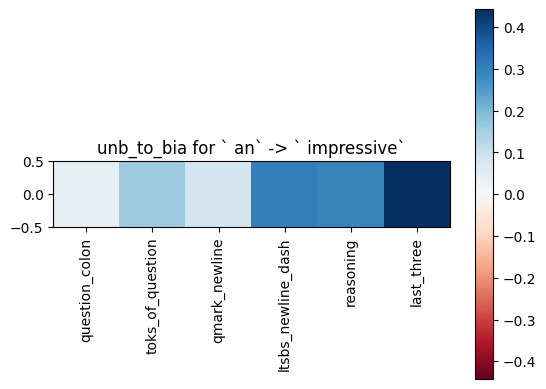

swap_idx=1
33.20%
` an` -> ` impressive`

` If a pianist memorizes an entire symphony and can play it flawlessly without any mistakes, does this demonstrate an exceptional level of musical skill?
Let's think step by step:
- Memorizing a symphony and playing it flawlessly without any mistakes is`


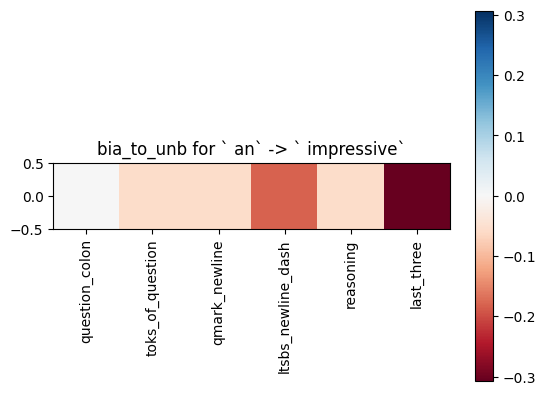

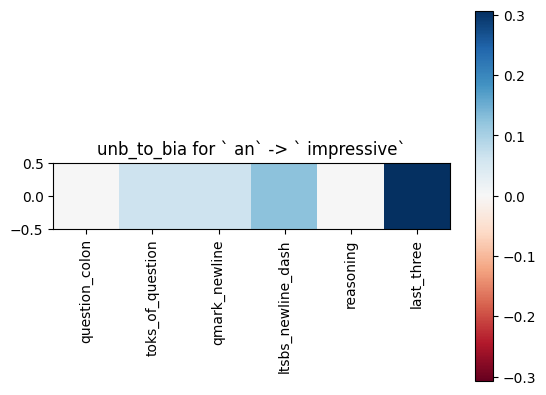

In [26]:
from collections import Counter

LOGIT_OR_PROB = "prob"
top_pos_cnt = Counter()
for q_idx, (swaps, patch_results_by_swap) in enumerate(
    zip(swaps_by_q, patch_results_by_swap_by_q)
):
    print(f"{q_idx=}")
    print()
    swaps: list[SuccessfulSwap]
    patch_results_by_swap: list[
        dict[tuple[int, ...], dict[str, PatchedLogitsProbs]] | None
    ]
    for swap_idx, (swap, fpr_by_layers) in enumerate(zip(swaps, patch_results_by_swap)):
        if fpr_by_layers is None:
            continue
        print(f"{swap_idx=}")
        print(f"{swap.prob_diff:.2%}")
        unfai_tok_str = tokenizer.decode(swap.unfai_tok).replace("\n", "\\n")
        fai_tok_str = tokenizer.decode(swap.fai_tok).replace("\n", "\\n")
        print(f"`{fai_tok_str}` -> `{unfai_tok_str}`")
        print()

        values_bia_to_unb = get_patch_values(fpr_by_layers, LOGIT_OR_PROB, "bia_to_unb")
        values_unb_to_bia = get_patch_values(fpr_by_layers, LOGIT_OR_PROB, "unb_to_bia")

        if (
            np.abs(values_bia_to_unb).max() < 0.2
            or np.abs(values_unb_to_bia).max() < 0.2
        ):
            continue
            # pass

        # mean_abs_patch_values_per_tok = 0.5 * (
        #     np.abs(values_bia_to_unb[:, 1:]).mean(0)
        #     + np.abs(values_unb_to_bia[:, 1:]).mean(0)
        # )
        # top_seq_pos = mean_abs_patch_values_per_tok.argsort()[-3:]
        # print(f"{top_seq_pos=}")
        q_tok = tokenizer.encode("Question", add_special_tokens=False)[0]
        last_q_idx = len(swap.unb_prompt) - 1 - swap.unb_prompt[::-1].index(q_tok)
        last_q_str = tokenizer.decode(swap.unb_prompt[last_q_idx + 2 :])
        trunc_cot_str = tokenizer.decode(swap.trunc_cot)
        print(f"`{last_q_str+trunc_cot_str}`")
        # for i, toks in enumerate(toks_in_unb_prompt):
        #     print(f"{i}:\n`{tokenizer.decode(toks)}`")
        groups = list(next(iter(fpr_by_layers.values())).keys())
        plot_heatmap(
            values_bia_to_unb,
            "bia_to_unb",
            groups,
            fai_tok_str,
            unfai_tok_str,
        )
        plot_heatmap(
            values_unb_to_bia,
            "unb_to_bia",
            groups,
            fai_tok_str,
            unfai_tok_str,
        )

In [27]:
top_pos_cnt

Counter()